<a href="https://colab.research.google.com/github/RF-Lab/lab_sources/blob/master/%D0%98%D0%BD%D1%82%D0%B5%D0%B3%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%98%D0%A1_06_19_03_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Средства интеграции языка Python с инструментами параллельного программирования на платформе NVIDIA CUDA®.

**Практическое занятие по дисциплине "Интеграция компонентов ИС"**

*Кафедра КБ-3 "Управление и моделирование систем" Института Комплексной Безопасности и Специального Приборостроения, МИРЭА, 2020г.*

**Дата проведения занятия:** 19.03.2020. 

**Время:** 18:20-21:20. 

**Место/Форма проведения занятия:** Дистанционное обучение/Конференция Skype. Ссылка на видео-конференцию будет предоставлена непосредственно перед занятием по почте.

**Цель:** Изучение платформы NVIDIA CUDA®, закрепление навыков использования библиотек Numba® (http://numba.pydata.org/) и PyCUDA (https://documen.tician.de/pycuda/, Andreas Klöckner, Nicolas Pinto, Yunsup Lee, Bryan Catanzaro, Paul Ivanov, Ahmed Fasih, PyCUDA and PyOpenCL: A scripting-based approach to GPU run-time code generation, Parallel Computing, Volume 38, Issue 3, March 2012, Pages 157-174). Реализация алгоритма двумерной фильтрации (применение Лапласиана к изображению) на платформе CUDA®.

**Технология параллельных с использованием NVIDIA GPU**

CUDA® - это аппаратная платформа для параллельных вычислений на базе GPU и программная среда для реализации высокопроизводительных параллельных вычислений разработанная компанией NVIDIA (NVIDIA Corporation, https://www.nvidia.com/en-us/about-nvidia/legal-info/).

Подробно --> https://developer.nvidia.com/cuda-zone

Компания NVIDIA представила технологию CUDA® в Ноябре 2006 года, охарактеризовав ее как аппаратную платформу для параллельных вычислений общего назначения и программную модель, реализующую концепцию параллельных вычислений на базе графических ускорителей NVIDIA GPU.

Основные отличия между архитектурой CPU и GPU представлены на схеме:
https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#from-graphics-processing-to-general-purpose-parallel-computing__gpu-devotes-more-transistors-to-data-processing

Значительная часть ресурсов CPU используется для кэширования данных и управления исполнением (организация ветвлений и циклов). Архитектура GPU направлена на параллельную обработку векторизованных данных без ветвлений.

Отличия в производительности вычислений между CPU и GPU представлены на графиках по ссылке:

https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#from-graphics-processing-to-general-purpose-parallel-computing__floating-point-operations-per-second-for-cpu-and-gpu

https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#from-graphics-processing-to-general-purpose-parallel-computing__memory-bandwidth-for-cpu-and-gpu

CUDA® включает программные средства которые позволяют использовать язык C++ для разработки высокопроизводительных параллельных алгоритмов. Также могут быть использованы другие языки высокого уровня. 

см. https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#cuda-general-purpose-parallel-computing-architecture__cuda-is-designed-to-support-various-languages-and-application-programming-interfaces


Базовым програмным инструментом для разработки приложений с использованием CUDA® Runtime является библиотека CUDA® Toolkit.

Подробно --> https://docs.nvidia.com/cuda/index.html.

Основными сущностями программной модели CUDA® являются: *Kernels* (ядра) и *Threads* (потоки). 

Kernel (ядро) - это функция, написанная на языке C++, которая вызывается и исполняется парралельно в контексте $N$ различных потоков (Threads).

Пример ядра: https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#kernels

Для использования CUDA® Toolkit в языке Python в подавляющем большинстве приложений используются библиотеки Numba® (http://numba.pydata.org/) и PyCUDA (https://documen.tician.de/pycuda/).

Библиотека PyCUDA использует вставки на языке C++ для описания kernel-функций.

Библиотека Numba® использует JIT (Just-In-Time) компилятор и позволяет использовать подмножество языка Python и Numpy для создания CUDA® приложений (без использования кода на C++). 

Для установки pyCuda в среде Google Colaboration следует использовать следующие команды:

In [0]:
pip install pycuda


     |████████████████████████████████| 1.6MB 35.8MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 81kB 13.6MB/s 
  Created wheel for pycuda: filename=pycuda-2019.1.2-cp36-cp36m-linux_x86_64.whl size=4537838 sha256=cc68f5f5b05e969a62d2f61515eb837896b78750041f0775bd3edb4221ec98d3
  Stored in directory: /root/.cache/pip/wheels/a6/60/f0/b1c430c73d281ac3e46070480db50f7907364eb6f6d3188396
  Created wheel for pytools: filename=pytools-2020.1-py2.py3-none-any.whl size=59602 sha256=0b402ddb0335538b3bc53dd915c67c45a2cd032af12ddc4c34cfcf1dcecbd2eb
  Stored in directory: /root/.cache/pip/wheels/6f/da/1b/946775a88291378182ed92c9800d6d0ebc2a554cb89829cc24
Successfully built pycuda pytools


In [0]:
!curl https://colab.chainer.org/install | sh -

Пример кода, реализующий вычисления с помощью PyCUDA:

In [0]:
import pycuda.autoinit
import pycuda.driver as drv
import numpy
 
from pycuda.compiler import SourceModule
mod = SourceModule("""
__global__ void multiply_them(float *dest, float *a, float *b)
{
  const int i = threadIdx.x;

  dest[i] = a[i] * b[i];
}
""")

multiply_them = mod.get_function("multiply_them")

a = numpy.random.randn(400).astype(numpy.float32)
b = numpy.random.randn(400).astype(numpy.float32)

dest = numpy.zeros_like(a)
multiply_them(
        drv.Out(dest), drv.In(a), drv.In(b),
        block=(width,height,1), grid=(1,1))

print( dest-a*b ) 

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

Библиотека Numba предустановлена по умолчанию в среде Google Colaboration. Пример программы с использованием Numba приведен ниже.

In [0]:
import numpy as np
from numba import vectorize

@vectorize(['float32(float32, float32)'], target='cuda')
def Add(a, b):
  return a + b

# Initialize arrays
N = 100000
A = np.ones(N, dtype=np.float32)
B = np.ones(A.shape, dtype=A.dtype)
C = np.empty_like(A, dtype=A.dtype)

# Add arrays on GPU
C = Add(A, B)


**Задание**

Реализовать алгоритм фильтрации изображения с использованием библиотек Numba и PyCuda. Сравнить эффективность реализации. Базовый алгоритм реализации фильтра Лапласа без использования GPU приведен ниже:



(-0.5, 767.5, 325.5, -0.5)

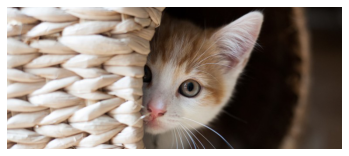

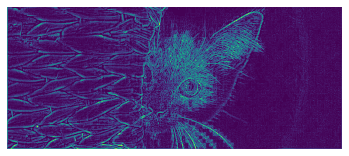

In [1]:
from PIL import Image
from PIL import ImageFilter
import requests
import matplotlib.pyplot as plt

img_url = 'https://www.humanesociety.org/sites/default/files/styles/768x326/public/2018/08/kitten-440379.jpg'

img = Image.open(requests.get(img_url, stream=True).raw)

plt.figure()
plt.imshow(img)
plt.axis('off')

#Y = .2126 * R^gamma + .7152 * G^gamma + .0722 * B^gamma
img_gs = img.convert("L")

img_px = img_gs.load()

Laplacian = ImageFilter.Kernel((3,3), (0,-1,0,-1,4,-1,0,-1,0), scale=0.1, offset=1)
img_la = img_gs.filter(Laplacian)
plt.figure()
plt.imshow(img_la)
plt.axis('off')
